Train RMSE: 5.2047
Test RMSE: 8.9142
Feature Importance Ranking:
Cu                           0.631333
Ba                           0.051469
gmean_Valence                0.046137
Ca                           0.029114
range_ThermalConductivity    0.020274
                               ...   
Hf                           0.000000
Os                           0.000000
Po                           0.000000
At                           0.000000
Rn                           0.000000
Length: 167, dtype: float32


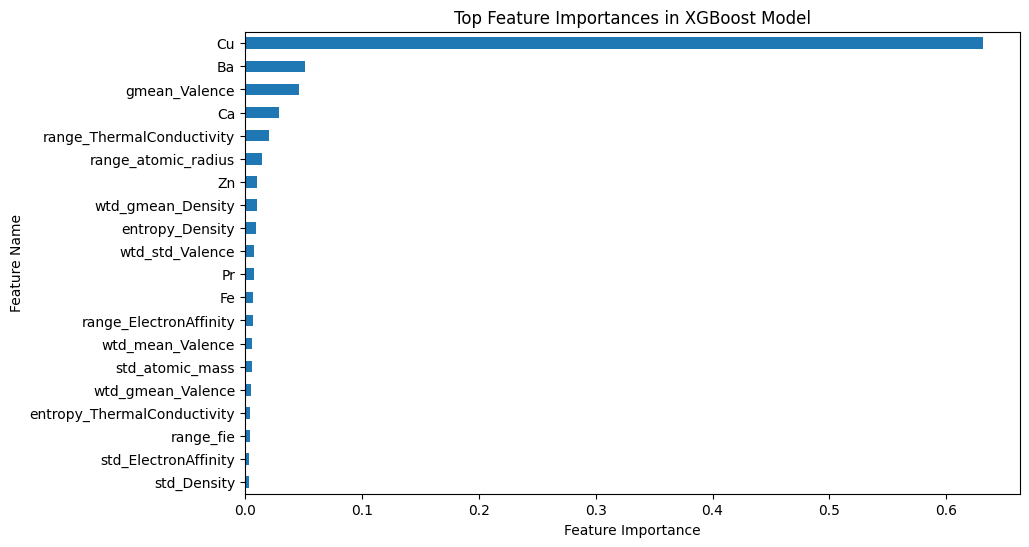

In [9]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load datasets
main_data = pd.read_csv("./data/train.csv")  # Superconductivity dataset
unique_m = pd.read_csv("./data/unique_m.csv")

# Remove 'critical_temp' from unique_m to avoid duplication
unique_m = unique_m.drop(columns=["critical_temp"], errors='ignore')

# Merge datasets assuming rows align (index-based merge)
merged_data = pd.concat([main_data, unique_m], axis=1)

# Define target and features
target = "critical_temp"  # Target variable
X = merged_data.drop(columns=[target, "material"])  # Drop 'material' column
y = merged_data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
model = xgb.XGBRegressor(n_estimators=200, max_depth=6, tree_method="hist", random_state=42)
model.fit(X_train, y_train)

# Evaluate Performance
train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Feature Importance
importance = pd.Series(model.feature_importances_, index=X_train.columns)
importance = importance.sort_values(ascending=False)

# Save feature importance ranking
importance.to_csv("feature_importance_ranking.csv")

# Print ranked features
print("Feature Importance Ranking:")
print(importance)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
importance[:20].plot(kind='barh')  # Show top 20 features
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top Feature Importances in XGBoost Model")
plt.gca().invert_yaxis()
plt.show()
